## 宿題2

線形モデル
$$f_{w, b} (x) = w^\top x + b$$

に対するサポートベクトルマシンの劣勾配アルゴリズム

$$\theta \leftarrow \theta - \varepsilon \left(\sum _{i=1}^n \partial \text{max} (0, 1-f_\theta (x_i) y_i)+\lambda R\theta \right) $$

$\varepsilon = 10^{-2}$

$\lambda = 10^{-2}$

$R = I$


とした

In [1]:
import numpy as np
import matplotlib.pyplot as plt

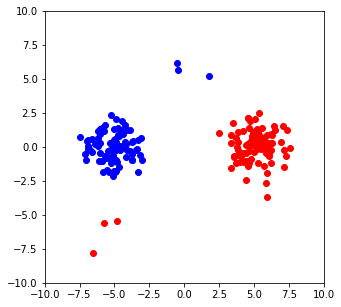

In [2]:
#  乱数生成
n = 100
x = np.random.normal(0, 1, (2, 2*n))
x[0, 0:n] -= 5
x[0, n:] += 5
x[0, 0:3] += 5
x[1, 0:3] += 7
x[0, n:n+3] -= 10
x[1, n:n+3] -= 6
y = np.array([1 for i in range(n)] + [-1 for i in range(n)])

plt.figure(figsize=(5,5))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(x[0,y==1], x[1,y==1], c='b')
plt.scatter(x[0,y==-1], x[1,y==-1], c='r')
plt.show()

In [3]:
#  各パラメータの初期化

w = np.random.normal(0, 1, (2))
b = np.random.normal(0, 1)
theta = np.array([w[0],w[1],b])
R = np.eye(len(theta))
eps = 1e-2
lam = 1e-2

def f(theta, x):
    return theta[:2].T @ x + theta[2]

In [4]:
#  100回劣勾配アルゴリズムの更新を実行
for ite in range(100):
    grad = np.zeros(len(theta))
    for i in range(2*n):
        if 1 - f(theta,x[:, i])*y[i] > 0:
            grad[0] += -y[i]*x[0,i]
            grad[1] += -y[i]*x[1,i]
            grad[2] += -y[i]
    theta = theta - eps*(grad + lam*R@theta)

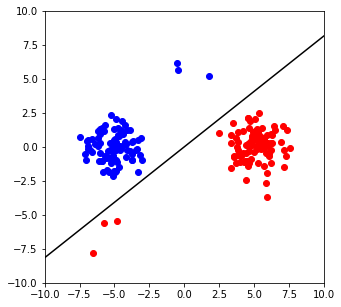

In [5]:
#  結果をプロット
plt.figure(figsize=(5,5))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(x[0,y==1], x[1,y==1], c='b')
plt.scatter(x[0,y==-1], x[1,y==-1], c='r')
X = np.linspace(-10, 10)
plt.plot(X, 1/theta[1]*(-theta[0]*X-theta[2]), c='black')
plt.show()